In [1]:
using QuadGK
using Polynomials

<a href="https://www.icsr.agh.edu.pl/~mownit/pdf/06_kwadratury.pdf"> Wykład </a>

Kwadratury Gaussa bazują na tzw. odciętych punktów Gaussa $x_{i}$ oraz współczynnikach $a_{i}$


In [2]:
# funkcja obliczająca odcięte punktów Gaussa oraz ich współczynniki 
(xp,a)=gauss(Float64,7)


([-0.949108, -0.741531, -0.405845, 0.0, 0.405845, 0.741531, 0.949108], [0.129485, 0.279705, 0.38183, 0.417959, 0.38183, 0.279705, 0.129485])

Podstawowe użycie w/w danych: 
aby policzyć $\int_{-1}^{1} f dx$  używamy odciętych punktów wraz z wagami wg wzoru 
$\sum_{i=1}^{n}{a_{i}f(x_{i})}$


In [3]:
f(x)=x^2
sum(a .* f.(xp)) 

0.6666666666666669

### Zadanie 1
- Korzytając z pakietu <a href="https://github.com/JuliaMath/Polynomials.jl">Polynomials</a> zaimplentuj wielomiany Legendre'a zdefiniowane w taki sposób:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

- narysuj ich wykresy w przedziale (-1,1). 
- sprawdź(np. za pomocą fukcji <i>roots</i> z pakietu Polynomials), że ich zera  sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
- podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

In [213]:
function lP(n)
    
    p0 = Poly([1.])
    p1 = Poly([0., 1.])
    
    if n == 0 return p0
   
    else
        for k = 1:(n - 1)
            p2 = ((Poly([0., (2 * k + 1.)]) * p1) - (k * p0)) / (k + 1.)
            p0 = p1
            p1 = p2
        end
        return p1
    end
end

lP (generic function with 1 method)

In [214]:
using Plots
using Roots

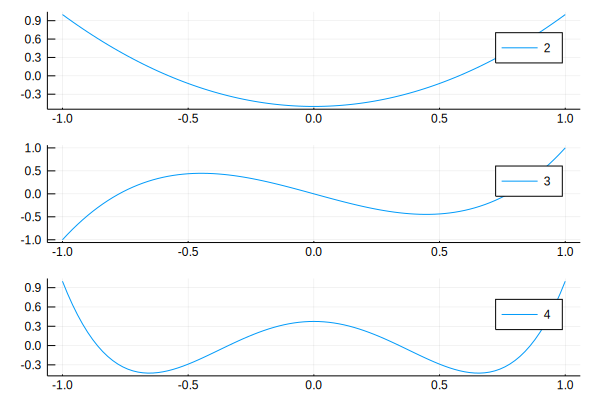

In [215]:
x = -1.:0.02:1.
y = lP(2)(x)
p2 = plot(x, y, label="2")
y = lP(3)(x)
p3 = plot(x, y, label="3")
y = lP(4)(x)
p4 = plot(x, y, label="4")
plot(p2, p3, p4, layout=(3,1))

In [238]:
for i = 2:4
    println("degree: ", i)
    r = find_zeros(lP(i), -1., 1.)
    println("roots: ", r)
    xp, a = gauss(Float64, i)
    println("gauss: ", xp)
end

degree: 2
roots: [-0.57735, 0.57735]
gauss: [-0.57735, 0.57735]
degree: 3
roots: [-0.774597, 0.0, 0.774597]
gauss: [-0.774597, 0.0, 0.774597]
degree: 4
roots: [-0.861136, -0.339981, 0.339981, 0.861136]
gauss: [-0.861136, -0.339981, 0.339981, 0.861136]


wyjaśnienie związku to slajd 50ty z wykładu

### Zadanie 2
- Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$  policzy $\int_{-1}^{1} f dx$
metodą używającą funkcji:
```julia
gauss(k)
```
oraz sumy 
```julia
sum(a .* f.(xp)) 
```
- przetestuj dla wielomianów coraz większych stopni
- sprawdz kiedy przestaje być dokładna, 
- podaj związek z twierdzeniem o  stopniu dokładności kwadratury Gaussa 

In [239]:
function integrate(f, k)
    x, weights = gauss(Float64, k)
    sum(weights .* f.(x))  
end

integrate (generic function with 2 methods)

In [240]:
eps = 1.0e-11

for gauss_deg=1:9
    
    good = true
    polymonial_degree = 0
    polymonial = Poly([rand()])
    
    while good
        
        polymonial *= Poly([rand(), rand()])
        polymonial_degree += 1
        
        exact_res = polyint(polymonial, -1, 1)
        quad_res = integrate(polymonial, gauss_deg)
        
        if abs(quad_res - exact_res) > eps
            good = false
        end
    end
    
    println("for degree: ", gauss_deg," is correct up to ", polymonial_degree - 1, "-degree poly integration")
end

for degree: 1 is correct up to 1-degree poly integration
for degree: 2 is correct up to 3-degree poly integration
for degree: 3 is correct up to 5-degree poly integration
for degree: 4 is correct up to 7-degree poly integration
for degree: 5 is correct up to 9-degree poly integration
for degree: 6 is correct up to 11-degree poly integration
for degree: 7 is correct up to 13-degree poly integration
for degree: 8 is correct up to 16-degree poly integration
for degree: 9 is correct up to 17-degree poly integration


twierdzenie o stopniu dokładności kwadratury Gaussa - slajd 51

### Zadanie 3
 
Skorzystaj z rozwiązania zadania 2 do napisania funkcji 
liczącej  całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$ 

dokonując normalizacji  do $\int_{-1}^{1} F(z) dz$ 

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz 

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.


In [219]:
function integrate(f, k, a, b)
    normalized = x -> f((a + b)/2. + x * ((b - a)/2.))
    return ((b - a)/2.) * integrate(normalized, k)
end

integrate (generic function with 2 methods)

In [220]:
p1 = Poly([0., 1.])
println("exact: ", polyint(p1, -0.8, 17.2))
println("custom: ", integrate(p1, 2, -0.8, 17.2))

exact: 147.6
custom: 147.5999999999999


In [221]:
p2 = Poly([rand(), rand(), rand(), rand()])
println("exact: ", polyint(p2, -15., 15.2))
println("custom: ", integrate(p2, 3, -15., 15.2))

exact: 140.71191041766315
custom: 140.71191041766352


### Zadanie 4
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja <a href="https://juliamath.github.io/QuadGK.jl/stable/#QuadGK.quadgk"> guadgk</a> używająca całkowania  Gauss-Kronroda

- użyj tej funkcji do policzenia  całki dla przykładowego wielomianu.
- funkcja ta ma możliwość liczenia również całek do nieskończoności
 Policz całkę od minus do plus nieskonczonosci 
 standardowego rozkładu normalnego Gaussa
$ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

Poly(0.9112739284596503*x^2 + 0.28816137766579875*x^4)

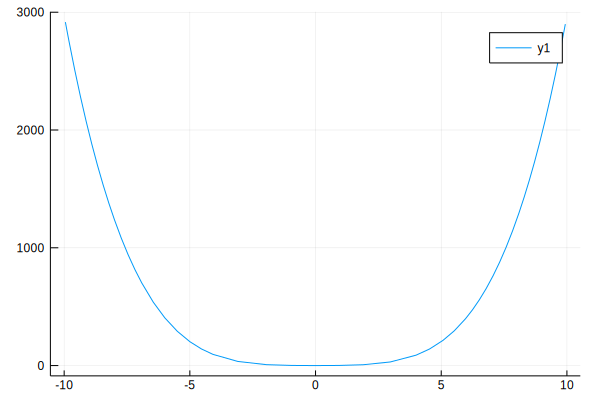

In [222]:
poly = Poly([0.0, 0.0, rand(), 0.0, rand()])
a = -10.
b = 10.
print(poly)
plot(x -> poly(x), a, b)

In [223]:
print("value: ", polyint(poly, a, b))
print("\nquadgk: ", quadgk(poly, a, b))

value: 12133.971058938385
quadgk: (12133.97105893838, 3.637978807091713e-12)

In [224]:
normal_distribution = x -> (1 / (sqrt(2*pi))) * exp(-(x*x)/2.)
print(quadgk(normal_distribution, -Inf, Inf))

(1.0000000000032583, 1.4395584941504537e-8)

### Zadanie 5
Napisz własną funkcję całkującą metodą prostokątów albo trapezów. Narysuj wykres funkcji błędu
w stosunku do wyniku otrzymanego analitycznie 
w zaleznosci od ilosci potrzebnych przedziałów  dla przykładowego wielomianu.

In [225]:
function rectangle(f, a, b, n)
    diff = (b - a) / n
    points = range(a, stop=b, length=n+1)
    area = [f(p[1]) * diff for p in zip(points[1:end-1])]
    sum(area)
end

rectangle (generic function with 1 method)

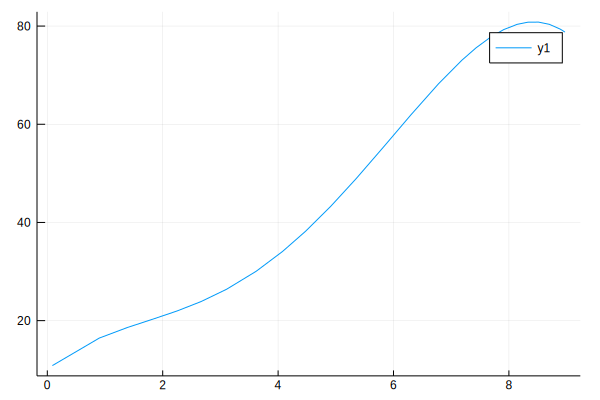

In [235]:
poly = Poly([10, 10, -4, 1, -0.065])
a = 0
b = 9
n = 6
plot(x -> poly(x), a, b)

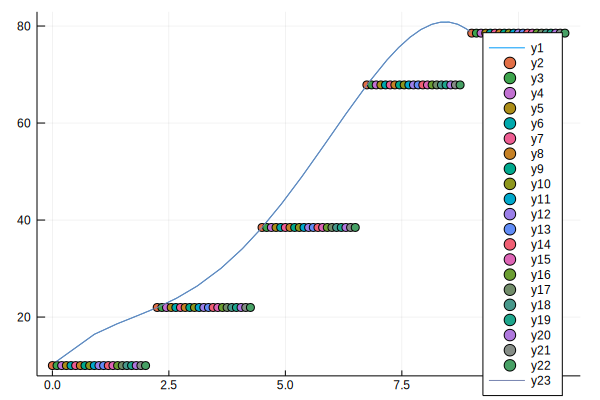

In [236]:
points1 = range(a, stop=b, length=n-1)
for l in 0:0.1:2
    points = range(a+l, stop=b+l, length=n-1)
    scatter!(points, poly(points1))
end
plot!(x -> poly(x), a, b)

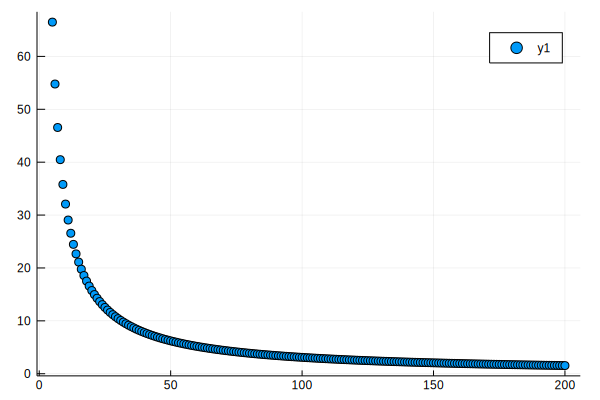

In [237]:
exact = polyint(poly, a, b)
rang = 5:1:200
errors = [abs(exact - rectangle(poly, a, b, n)) for n in rang]
scatter(rang, errors)